# <span style='color:black'><font size="6">CNN Model for  detection of Melanoma </font></span>
# <span style='color:brown'><font size="5">Assignment </font></span>
***
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
<span style='color:Black'><font size="3">Author: Shrinivas-Bhat, Batch: C50</font></span>
</span>$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$<span style='color:Black'> <font size="3">Date: 03/Sept/2023</font></span>

### Problem statement:
- Build a CNN Model to detect Melonoma
- Melonoma is a type of Caner that can be deadly if not detected early
- Melonoma accounts for 75% of skin cancer deaths
- Evaluate images and alert the dermatologists about the presence of melanoma and reduce of manual effort needed in diagnosis


## Importing all the important libraries

In [795]:
import pathlib
import tensorflow as tf
tf.autograph.experimental.do_not_convert
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [796]:
import matplotlib.pyplot as plt

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img


In [797]:
from skimage import io
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import random

In [798]:
import warnings
warnings.filterwarnings('ignore')

## Routines and Functions

##### Plotting Image

In [799]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

In [800]:
def plot_performance(history,title='',size=(8,8)):
    print(title)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(np.size(val_loss))

    plt.figure(figsize=size)
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [801]:
def comparison_plot(history_1,history_2,Title='',size=(10,10),label1='',label2=''):
    print(Title)
    acc_1 = history_1.history['accuracy']
    val_acc_1 = history_1.history['val_accuracy']

    loss_1 = history_1.history['loss']
    val_loss_1 = history_1.history['val_loss']

    acc_2 = history_2.history['accuracy']
    val_acc_2 = history_2.history['val_accuracy']

    loss_2 = history_2.history['loss']
    val_loss_2 = history_2.history['val_loss']

    epochs_range = range(min(epochs,np.size(acc_1),np.size(acc_2)))

    plt.figure(figsize=size)

    plt.subplot(2, 2, 1)
    prl='Training Accuracy'
    lab1 = [prl,label1]
    lab2 = [prl,label2]
    plt.plot(epochs_range, acc_1[:np.size(epochs_range)], label=' '.join(lab1))
    plt.plot(epochs_range, acc_2[:np.size(epochs_range)], label=' '.join(lab2))
    plt.legend(loc='lower right')
    plt.title('Training accuracy Comparison')

    plt.subplot(2, 2, 2)
    prl='Validation Accuracy'
    lab1=[prl,lab2]
    lab1 = [prl,label1]
    lab2 = [prl,label2]
    plt.plot(epochs_range, val_acc_1[:np.size(epochs_range)], label=' '.join(lab1))
    plt.plot(epochs_range, val_acc_2[:np.size(epochs_range)], label=' '.join(lab2))
    plt.legend(loc='lower right')
    plt.title('Validation accuracy Comparison')



    plt.subplot(2, 2, 3)
    prl='Training Loss'
    lab1 = [prl,label1]
    lab2 = [prl,label2]
    plt.plot(epochs_range, loss_1[:np.size(epochs_range)], label=' '.join(lab1))
    plt.plot(epochs_range, loss_2[:np.size(epochs_range)], label=' '.join(lab2))
    plt.legend(loc='lower right')
    plt.title('Training loss Comparison')

    plt.subplot(2, 2, 4)
    prl='Validation Loss'
    lab1 = [prl,label1]
    lab2 = [prl,label2]
    plt.plot(epochs_range, val_loss_1[:np.size(epochs_range)], label=' '.join(lab1))
    plt.plot(epochs_range, val_loss_2[:np.size(epochs_range)], label=' '.join(lab2))
    plt.legend(loc='lower right')
    plt.title('Validation loss Comparison')



In [802]:
    prl='Training Accuracy'
    lab2 = 'test'
    lab1=[prl,lab2]
    #lab1 = lab1.append('test')
    #lab2 = lab2.append('test2')
    print(lab1)

['Training Accuracy', 'test']


#### Create a dataframe with classname and # of images for that class

In [803]:
def count_images(directory,size=(8,8)):
    
    #count number of image in each classes
    cnt= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            #count.append(len([name for name in os.listdir(path)
            #                   if os.path.isfile(os.path.join(path, name))]))
            cnt.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))])+len([name for name in path.glob('output/*.jpg')]))    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    percent     = list(np.round(cnt/np.sum(cnt)*100,0))    
    #return dataframe with image count and class.
    outDf = pd.DataFrame(list(zip(sub_directory,cnt,percent)),columns =['Class', 'No. of Image','percent(%)'])
    plt.figure(figsize=size)
    plt.bar(outDf.Class,outDf['percent(%)'])
    plt.xticks(rotation = 90)
    plt.show()
    return outDf


In [804]:
# TEST FUNCTION
#Path = './Skin cancer ISIC The International Skin Imaging Collaboration';
#tempPath = pathlib.Path(''.join([Path,'/Train']))
#print(count_images(tempPath))

### Various variants of CNN Model Function's

In [805]:
def custCNN1(enableDropout=False,nClasses=2):
    model=Sequential()   
    #CNN Model Architecture
    #Sequential allows you to create models model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
    model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
    #model.add(BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    if enableDropout:
        #Dropout layer with 25% Fraction of the input units to drop.
        model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
    if enableDropout:
        #Dropout layer with 25% Fraction of the input units to drop.
        model.add(layers.Dropout(0.25))  
    model.add(layers.Dense(nClasses,activation='softmax'))
    return model


In [806]:
def custCNN2(enableDropout=False,nClasses=2):
    #CNN Model Architecture
    #Sequential allows you to create models layer-by-layer  
    # Variables
    INPUT_SHAPE = (180, 180, 3)
    FILTER1_SIZE = 32
    FILTER2_SIZE = 128
    FILTER_SHAPE = (3, 3)
    POOL_SHAPE = (2, 2)
    FULLY_CONNECT_NUM = 128
    NUM_CLASSES = nClasses

    # Model architecture implementation
    model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
    model.add(layers.Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
    model.add(layers.MaxPooling2D(POOL_SHAPE))
    model.add(layers.Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
    model.add(layers.MaxPooling2D(POOL_SHAPE))
    if enableDropout==True:
        model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(FULLY_CONNECT_NUM, activation='relu'))
    if enableDropout==True:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    return model


In [807]:
def custCNN3(enableDropout=False,nClasses=2):
    NUM_CLASSES = nClasses
    model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
    model.add(layers.Conv2D(16, 3, activation='relu', input_shape=(180,180),padding='same'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(32, 3, activation='relu',padding='same'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(64, 3, activation='relu',padding='same'))
    model.add(layers.MaxPooling2D())
    if enableDropout==True:
        model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(nClasses, activation='softmax'))
    return model

In [808]:
def custCNN(enableDropout=False,Choice=0,nClasses=5):
    if (Choice==0):
        model = custCNN1(enableDropout,nClasses)
    if (Choice==1):
        model = custCNN2(enableDropout,nClasses)
    if (Choice==2):
        model = custCNN3(enableDropout,nClasses)
    return model

#### CHOICE OF CNN MODEL
- Choice=2 (custCNN3) after multiple iterations this seems to give the best fit with good training and validation accuracy 

In [809]:
## Selection of the Model
Choice = 2 #0,1,2 as above

# For Testing (Usage)
#model = custCNN(enableDropout=True,Choice=Choice,nClasses=9)
#model.summary

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Importing Skin Cancer Data
- Read the data

##### Data Reading/Data Understanding
- Defining the path for train and test images 
- Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
- Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset

In [810]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
Path = './Skin cancer ISIC The International Skin Imaging Collaboration';
# For Google Colab
#Path = ''
data_dir_train = pathlib.Path(''.join([Path,'/Train']))
data_dir_test = pathlib.Path(''.join([Path,'/Test']))

In [811]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [812]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)
print(image_count_train+image_count_test)

2239
118
2357


#### Remove any Augmented output 
- When running second time we need to ensure that the augmented files are removed.



In [813]:
for filename in list(data_dir_train.glob('*/output/*.jpg')):
        os.remove(filename)

### Load using keras.preprocessing

- Loading the Image dataset from the training directory
- Count the Classes of Both training and test datasets
- Plotting the random representative image in each class from the loaded training image



Found 6739 files belonging to 9 classes.


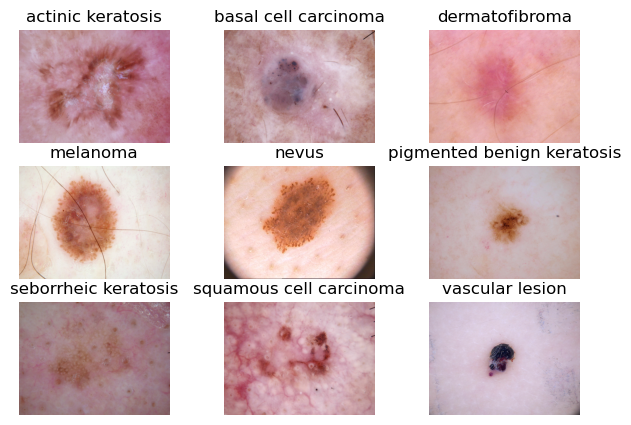

In [870]:
#Visualize one instance of all the class present in the dataset.

#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
#print(files_path_dict['actinic keratosis'][2])
#plt.imshow(load_img(files_path_dict['actinic keratosis'][np.random.randint(np.size(files_path_dict['actinic keratosis']))]))
#print()
#print()
if 1:
    #Visualize image 
    plt.figure(figsize=(7.5,5))
    index = 0
    for c in class_names:
        rInd = np.random.randint(np.size(files_path_dict[c])); #random Index
        path_list = files_path_dict[c][rInd]
        #print(path_list)
        index += 1
        plt.subplot(3,3,index)
        image = io.imread(files_path_dict[c][rInd])
        plt.imshow(image)
        #plt.imshow(load_img(path_list,target_size=(180,180)))
        plt.title(c)
        plt.axis("off")
        


Training Image Count


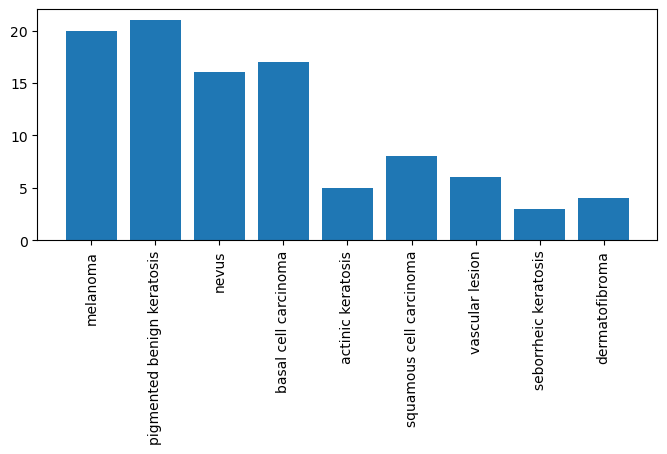

                        Class  No. of Image  percent(%)
0                    melanoma           439        20.0
1  pigmented benign keratosis           462        21.0
2                       nevus           358        16.0
3        basal cell carcinoma           377        17.0
4           actinic keratosis           115         5.0
5     squamous cell carcinoma           181         8.0
6             vascular lesion           139         6.0
7        seborrheic keratosis            78         3.0
8              dermatofibroma            95         4.0


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [815]:
print("Training Image Count")
print(count_images(data_dir_train,(8,3)))
plt.figure(figsize=(5,5))


#### Observation
- High Class imbalance seen

### Create a dataset

Define some parameters for the loader:

In [816]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [817]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# train_ds = ##todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size,
                                                               image_size=(img_height,img_width), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)




Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [818]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#val_ds = ##todo

# validation dataset 
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,
                                                            image_size=(img_height,img_width), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [819]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

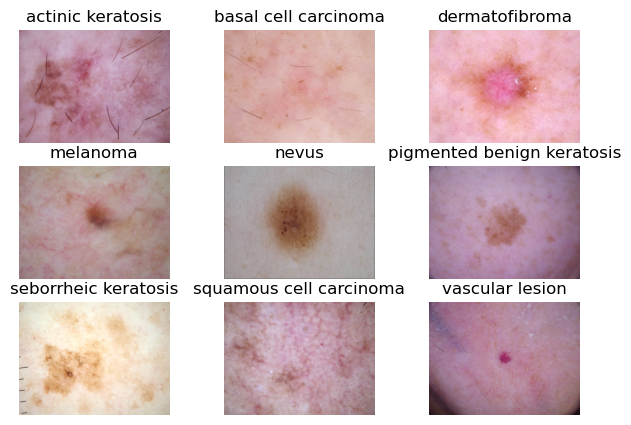

In [820]:
import matplotlib.pyplot as plt
if 1:
    #Visualize image 
    plt.figure(figsize=(7.5,5))
    index = 0
    for c in class_names:
        rInd = np.random.randint(np.size(files_path_dict[c])); #random Index
        path_list = files_path_dict[c][rInd]
        #print(path_list)
        index += 1
        plt.subplot(3,3,index)
        image = io.imread(files_path_dict[c][rInd])
        plt.imshow(image)
        #plt.imshow(load_img(path_list,target_size=(180,180)))
        plt.title(c)
        plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [821]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## MODEL-I : Training the CNN with the Available/Provided Images
- Create a CNN model, which can accurately detect 9 classes present in the dataset. 
- Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). 
- The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

##### Model Building & training : 
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training
- Train the model for ~20 epochs
- Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.


Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_54 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_162 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_162 (MaxPool  (None, 90, 90, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_163 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_163 (MaxPool  (None, 45, 45, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_164 (Conv2D)         (None, 45, 45, 64)      

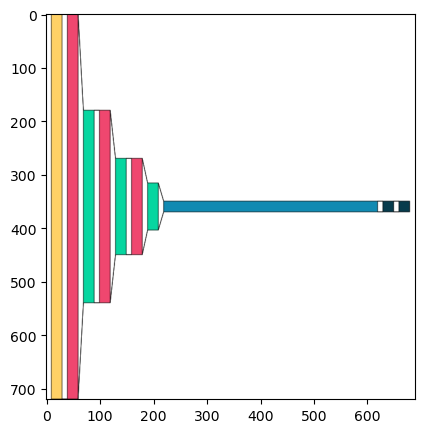

In [871]:
import visualkeras
#Choice = 0
model = custCNN(enableDropout=False,Choice=Choice,nClasses=len(class_names))
model.summary()

#plt.imshow(visualkeras.layered_view(model).)
#visualkeras.layered_view(model).show() # display using your system viewer
#visualkeras.layered_view(model, to_file='output.png') # write to disk
#visualkeras.layered_view(model, to_file='output.png').show() # write and show

#visualkeras.layered_view(model)
plt.figure(figsize=(5,5))
plt.imshow(visualkeras.layered_view(model,draw_volume=False))

In [823]:
!pip install pydot
!pip install graphviz

In [824]:
# vizualizing the model
import keras
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [825]:
#Adam optimization: Stochastic gradient method with adaptive learning rates.
#categorical_crossentropy: Loss Function for Multiclass classification 

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=10,mode="auto",verbose=1)

### Train the Model

In [826]:
# Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
56/56 [==============================] - ETA: 0s - loss: 1.9003 - accuracy: 0.2980WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2f88acee0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full out

### Visualizing training results

*******CNN Results (Without Augmentation, Without Dropouts)******


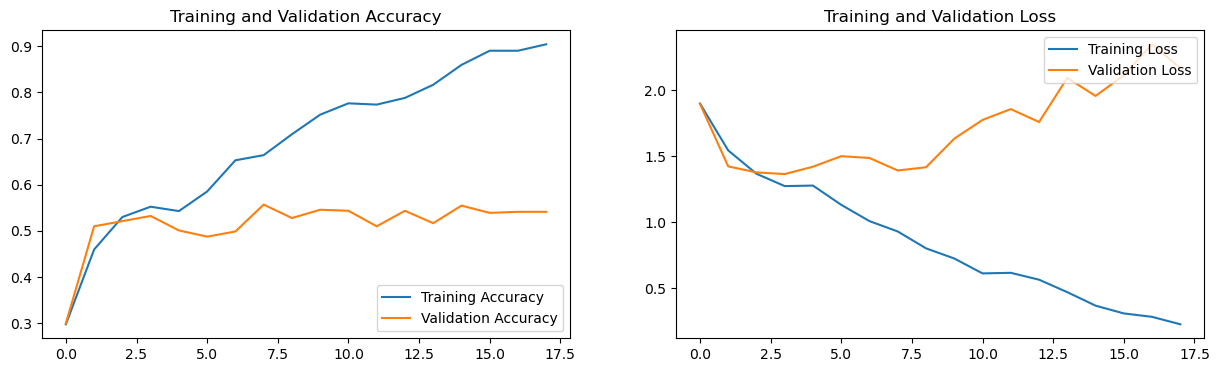

In [827]:
plot_performance(history,'*******CNN Results (Without Augmentation, Without Dropouts)******',(15,4))

In [828]:
history_default = history

### MODEL-1 Insights
- We can see that the training accuracy is increasing where as the Validation accuracy is saturating to 0.55
- This indicates the overfit , also we see that the validation loss starts increasing around 8th Epoch


#### -------------------------------------------------------------- * --------------------------------------------------------------  ###########

## MODEL-II : Enabling the Dropouts in the CNN Network
- Trying the dropout to check if the overfit issue is resolved.
#### Create the model, compile and train the model




In [829]:
!pip install visualkeras


Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_51 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_153 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_153 (MaxPool  (None, 90, 90, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_154 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_154 (MaxPool  (None, 45, 45, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_155 (Conv2D)         (None, 45, 45, 64)      

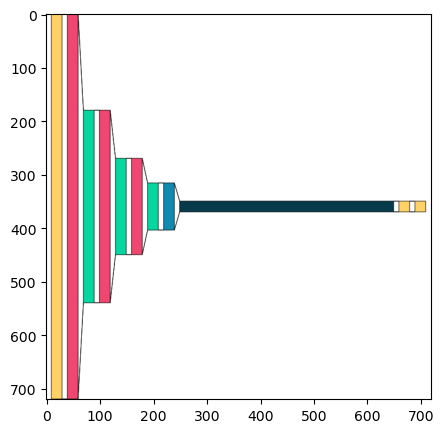

In [830]:
import visualkeras
model = custCNN(enableDropout=True,Choice=Choice,nClasses=len(class_names))
model.summary()

#plt.imshow(visualkeras.layered_view(model).)
#visualkeras.layered_view(model).show() # display using your system viewer
#visualkeras.layered_view(model, to_file='output.png') # write to disk
#visualkeras.layered_view(model, to_file='output.png').show() # write and show

#visualkeras.layered_view(model)
plt.figure(figsize=(5,5))
plt.imshow(visualkeras.layered_view(model,draw_volume=False))

#### Compiling the model

In [831]:
#Adam optimization: Stochastic gradient method with adaptive learning rates.
#categorical_crossentropy: Loss Function for Multiclass classification 
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=10,mode="auto",verbose=1)

#### Training the model

In [832]:
# Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
56/56 [==============================] - ETA: 0s - loss: 2.0422 - accuracy: 0.2344WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x29dcfba30> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full out

### Visualizing the results

*******CNN Results (Without Augmentation, With Dropouts)******


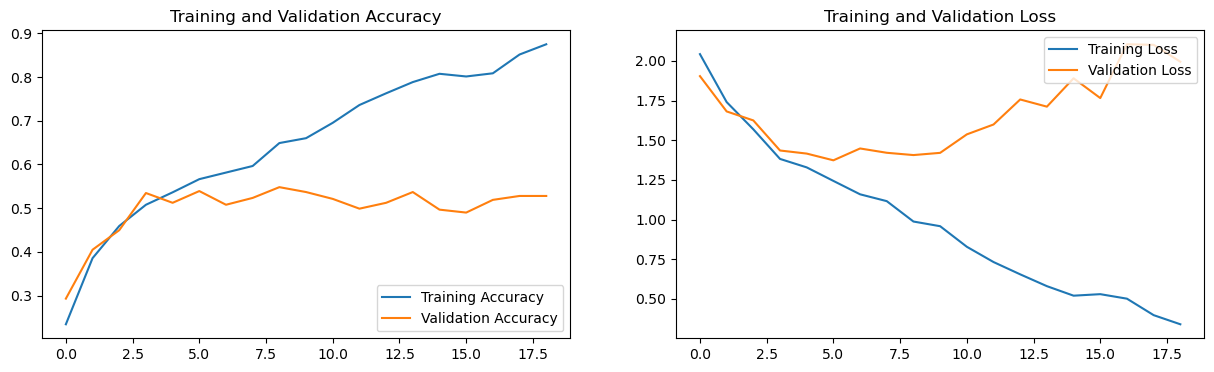

In [833]:
plot_performance(history,'*******CNN Results (Without Augmentation, With Dropouts)******',(15,4))

###### Comparison wit no dropouts

*******CNN Results Comparison with and without Dropout********


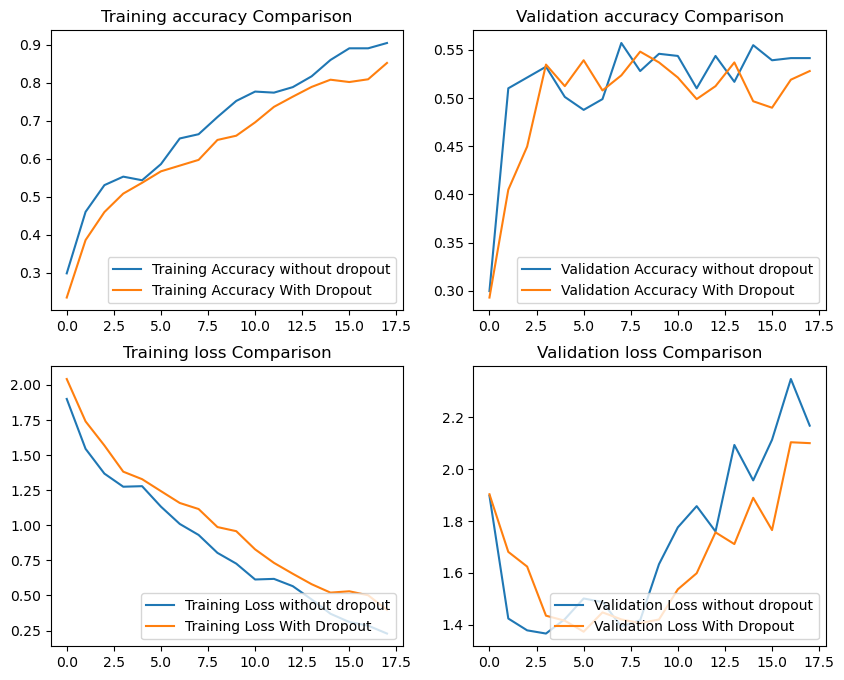

In [834]:
comparison_plot(history_default,history,Title='*******CNN Results Comparison with and without Dropout********'
                ,size=(10,8),label1='without dropout',label2='With Dropout')


In [835]:
history_dropout = history

### Model_II Insights

- Training accuracy of the dropout seem to be slightly degraded compared to the that without dropout
- Validation accuracy with the dropout is also saturated but slightly better compared to the one with dropout.
- This may be indicating that it may be trying to reduce the overfit issue seen in without dropout.
- Validation loss with dropouts have slightly better comared to without dropout but it is not enough.
- Dropouts have not contributed significantly in improving the validation loss or accuracy


## MODEL-III : CNN with augmentation
- Trying the dropout to check if the overfit issue is resolved.
##### Model Building & training on the augmented data :
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training
- Train the model for ~20 epochs
- Write your findings after the model fit, see if the earlier issue is resolved or not?

In [836]:
for filename in list(data_dir_train.glob('*/output/*.jpg')):
        os.remove(filename)

### data augmentation


In [837]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

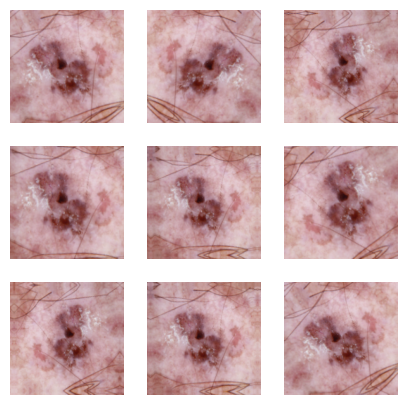

In [838]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(5, 5))
for images, _ in train_ds.take(1):
  for i in range(len(class_names)):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Model

In [839]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
if 1:
    model = Sequential([
      data_augmentation,
      layers.experimental.preprocessing.Rescaling(1./255),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(9,activation='softmax')
    ])


In [840]:
#model = custCNN(enableDropout=True,Choice=Choice,nClasses=9)

In [841]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)





AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### Compiling the Model

In [842]:
## Your code goes here
#Adam optimization: Stochastic gradient method with adaptive learning rates.
#categorical_crossentropy: Loss Function for Multiclass classification 

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])
#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
#checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
#earlystop = EarlyStopping(monitor="val_accuracy",patience=10,mode="auto",verbose=1)

### Model Fit

In [843]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20 #Use 50
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
56/56 [==============================] - ETA: 0s - loss: 2.0028 - accuracy: 0.2483WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2a7ddeb00> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full out

*******CNN Results After Augmentation******


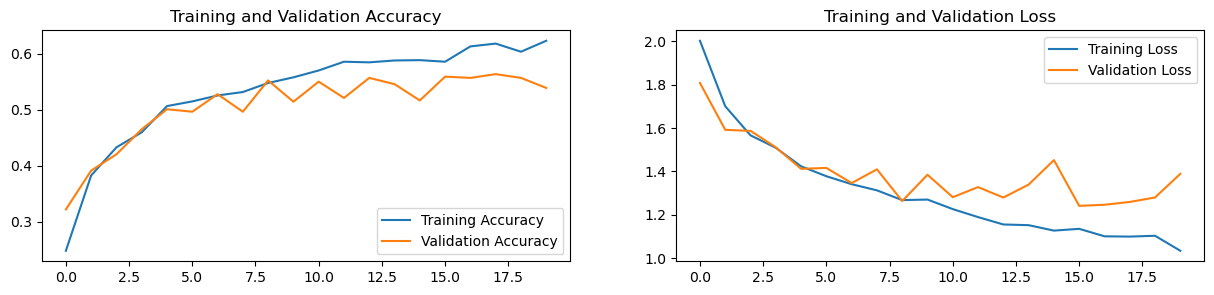

In [844]:
plot_performance(history,'*******CNN Results After Augmentation******',(15,3))

*******CNN Results Comparison with and without Dropout********


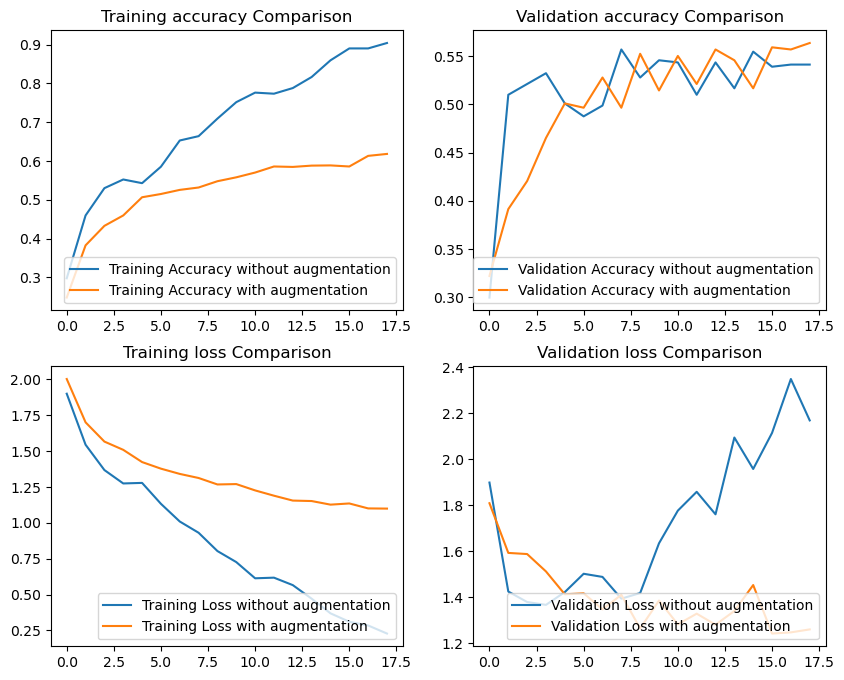

In [845]:
comparison_plot(history_default,history,Title='*******CNN Results Comparison with and without Dropout********'
                ,size=(10,8),label1='without augmentation',label2='with augmentation')

### MODEL-III Insights

- CNN with data augmentation is providing better accuracy compared to the ones without augmentation

##### ----------------------------------------------*--------------------------------------------

##  CLASS DISTRIBUTION
- Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. 
- Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#### Steps

- Class distribution: Examine the current class distribution in the training dataset 
- Which class has the least number of samples?
- Which classes dominate the data in terms of the proportionate number of samples?
- Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.

### Current Class Distribution

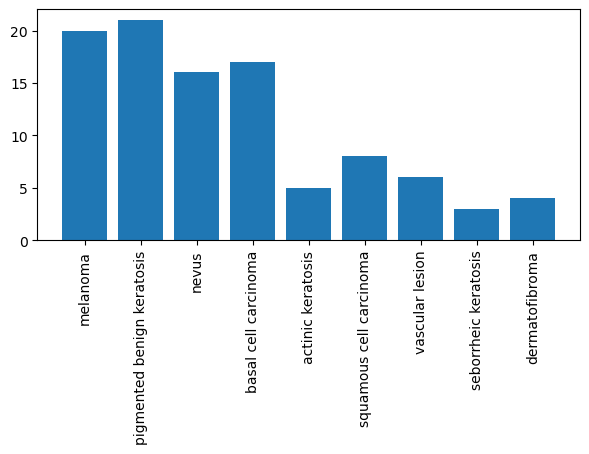

,Class,No. of Image,percent(%)
0,melanoma,439,20.0
1,pigmented benign keratosis,462,21.0
2,nevus,358,16.0
3,basal cell carcinoma,377,17.0
4,actinic keratosis,115,5.0
5,squamous cell carcinoma,181,8.0
6,vascular lesion,139,6.0
7,seborrheic keratosis,78,3.0
8,dermatofibroma,95,4.0


In [846]:
count_images(data_dir_train,(7,3))


- "seborrheic keratosis"	has the leasst # of samples in train images
-  Melanoma,pigmented benign keratosis,basal cell carcinoma,nevus dominate in # of training images 


### RECTIFICATION OF CLASS IMBALANCE USING AUGMENTOR
- Using python package as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.


##### Remove Augmented Data already present if any

In [847]:
for filename in list(data_dir_train.glob('*/output/*.jpg')):
        os.remove(filename)

In [848]:
!pip install Augmentor

##### Augmentor Usage
1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [849]:
path_to_training_dataset="./Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    #p.crop_centre(probability=0.7,percentage_area=0.6)
    #p.sample(50)
    #p.flip_random(probability = 0.3)
    #p.sample(50)
    #p.random_distortion(probability = 0.7,grid_width=6,grid_height=6,magnitude=8)
    #p.sample(50)
    
    #p.random_brightness(probability = 0.7)
    #p.sample(50)
    #p.random_contrast(probability = 0.7,min_factor = 0,max_factor=1)
    #p.sample(50)

Initialised with 114 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2F89072B0>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2E294FA00>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A0361D20>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x29F107A30>: 100%|█|


Initialised with 357 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=962x674 at 0x32D6DF5B0>: 100%|█|


Initialised with 462 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2DE8CCD60>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 181 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A899A7D0>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2F89076A0>: 100%|█|


### Class Distribution After Augmentation
Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [850]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


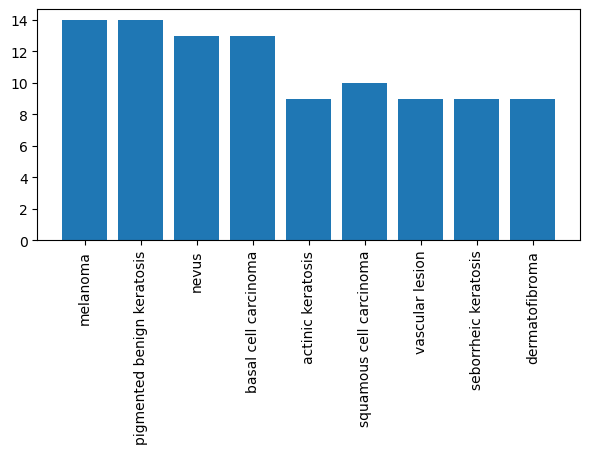

,Class,No. of Image,percent(%)
0,melanoma,939,14.0
1,pigmented benign keratosis,962,14.0
2,nevus,858,13.0
3,basal cell carcinoma,877,13.0
4,actinic keratosis,615,9.0
5,squamous cell carcinoma,681,10.0
6,vascular lesion,639,9.0
7,seborrheic keratosis,578,9.0
8,dermatofibroma,595,9.0


In [851]:
count_images(data_dir_train,(7,3))


### Lets see the distribution of augmented data after adding new images to the original training data.

In [852]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list_new

In [853]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [854]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [855]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,melanoma
1,Skin cancer ISIC The International Skin Imagin...,melanoma
2,Skin cancer ISIC The International Skin Imagin...,melanoma
3,Skin cancer ISIC The International Skin Imagin...,melanoma
4,Skin cancer ISIC The International Skin Imagin...,melanoma
...,...,...
4495,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4496,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4497,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4498,Skin cancer ISIC The International Skin Imagin...,dermatofibroma


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [856]:
batch_size = 32
img_height = 180
img_width = 180

In [857]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

#### **Todo:** Create a training dataset

In [858]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = "training",
    label_mode = 'categorical',## Todo choose the correct parameter value, so that only training data is refered to,,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [859]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  label_mode = 'categorical',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [860]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [861]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.

#`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

#`Dataset.prefetch()` overlaps data preprocessing and model execution while training.


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## MODEL_IV : Building the CNN with Rectified Class Imbalance

##### Steps for Model Building & training on the rectified class imbalance data :
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training
- Train the model for ~30 epochs

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_53 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_159 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_159 (MaxPool  (None, 90, 90, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_160 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_160 (MaxPool  (None, 45, 45, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_161 (Conv2D)         (None, 45, 45, 64)      

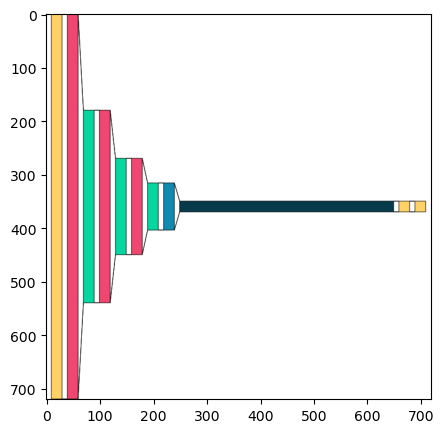

In [862]:
## your code goes here
import visualkeras
model = custCNN(enableDropout=True,Choice=Choice,nClasses=len(class_names))
model.summary()

#plt.imshow(visualkeras.layered_view(model).)
#visualkeras.layered_view(model).show() # display using your system viewer
#visualkeras.layered_view(model, to_file='output.png') # write to disk
#visualkeras.layered_view(model, to_file='output.png').show() # write and show

#visualkeras.layered_view(model)
plt.figure(figsize=(5,5))
plt.imshow(visualkeras.layered_view(model,draw_volume=False))

#### Compile the Model

In [863]:
#Adam optimization: Stochastic gradient method with adaptive learning rates.
#categorical_crossentropy: Loss Function for Multiclass classification 

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])
#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=10,mode="auto",verbose=1)

#### Training the CNN

In [864]:
epochs = 30 #Use 50
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
169/169 [==============================] - ETA: 0s - loss: 1.7942 - accuracy: 0.3145WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2a10c24d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

Epoch 23/30
169/169 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9479
Epoch 23: val_accuracy did not improve from 0.83667
169/169 [==============================] - 15s 89ms/step - loss: 0.1276 - accuracy: 0.9479 - val_loss: 0.7982 - val_accuracy: 0.8099
Epoch 24/30
169/169 [==============================] - ETA: 0s - loss: 0.1588 - accuracy: 0.9401
Epoch 24: val_accuracy did not improve from 0.83667
169/169 [==============================] - 15s 89ms/step - loss: 0.1588 - accuracy: 0.9401 - val_loss: 0.8616 - val_accuracy: 0.8196
Epoch 25/30
169/169 [==============================] - ETA: 0s - loss: 0.2187 - accuracy: 0.9288
Epoch 25: val_accuracy did not improve from 0.83667
169/169 [==============================] - 15s 89ms/step - loss: 0.2187 - accuracy: 0.9288 - val_loss: 0.8271 - val_accuracy: 0.8218
Epoch 25: early stopping


####  Visualize the model results

*******CNN Results After Class Rebalancing******


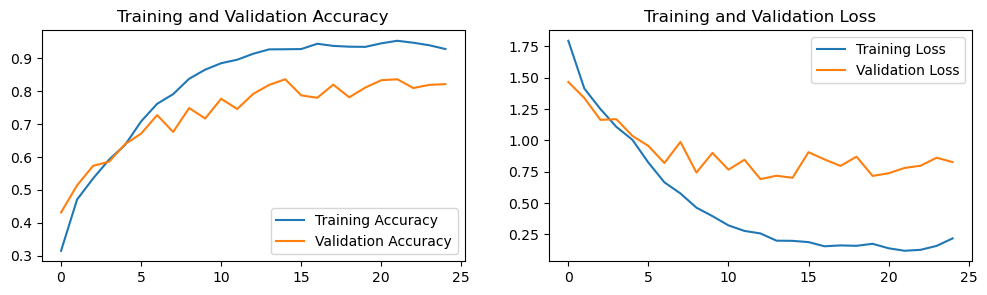

In [865]:
plot_performance(history,'*******CNN Results After Class Rebalancing******',(12,3))

*******CNN Results Comparison with Class Rebalancing********


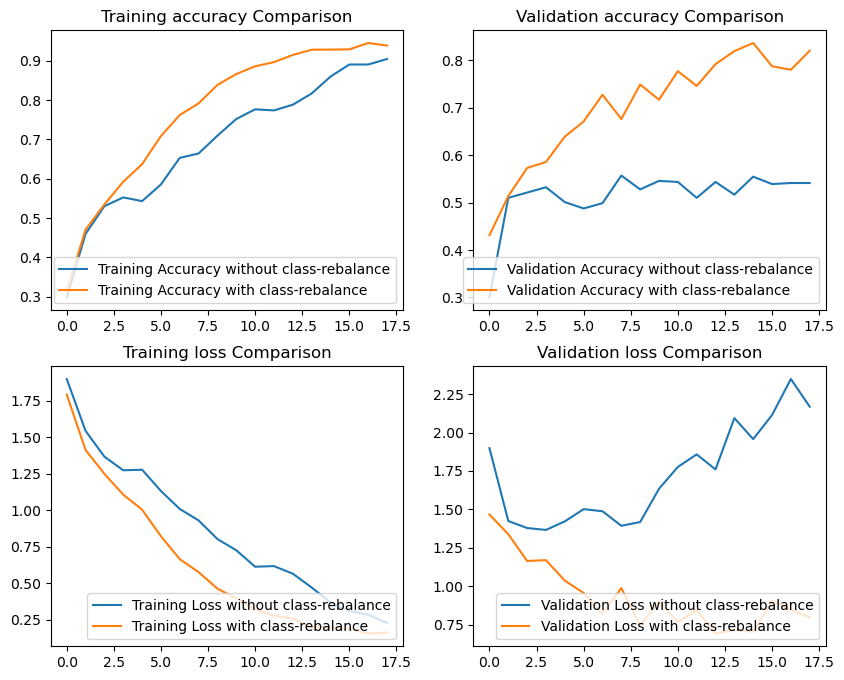

In [866]:
comparison_plot(history_default,history,Title='*******CNN Results Comparison with Class Rebalancing********'
                ,size=(10,8),label1='without class-rebalance',label2='with class-rebalance')

In [867]:
history_final = history

### MODEL-IV Insights

- Class Rebalancing through Augmenting images improved the valdation accuracy to 82% from around 50%
- From the training accuracy plots we can clearly see that the overfit issue is not seen with class-rebalance
- Validation/Training loss with augmentation reached a deeper minima compared to without the augmentation


###### -------------------------------------------------------------------------------

### MODEL PREDICTION

- saved model during the final training with augmented images is used to predict on the testing data


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 34ms/step
2
Actual Class dermatofibroma
Predictive Class dermatofibroma


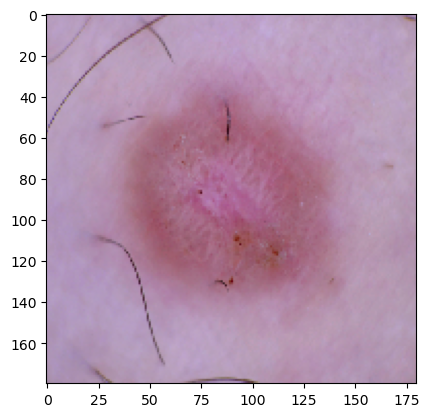

In [869]:
from glob import glob
model  = tf.keras.models.load_model('./model.h5')
classselect = np.random.randint(dtest.Class.count()-1)
nInd = np.random.randint(dtest["No. of Image"][classselect]-1)
Test_image_path = os.path.join(data_dir_test, class_names[classselect], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[nInd],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred

pred = np.argmax(pred)

print(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[classselect] +'\n'+ "Predictive Class "+pred_class )